In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn import tree

#import graphviz

import seaborn as sns

In [2]:
import seffaflik
from seffaflik.elektrik import santraller, tuketim, uretim, yekdem

In [4]:
df_prod = uretim.gerceklesen(baslangic_tarihi='2021-06-01', bitis_tarihi='2021-06-15')

In [5]:
df_prod.head(2)

,Tarih,Saat,Doğalgaz,Barajlı,Linyit,Akarsu,İthal Kömür,Rüzgar,Güneş,Fuel Oil,Jeo Termal,Asfaltit Kömür,Taş Kömür,Biyokütle,Nafta,LNG,Uluslararası,Toplam
0,2021-06-01,0,12671.91,4414.08,4709.13,1674.48,5705.35,1827.73,0.0,42.1,1170.28,335.61,396.38,636.00,0,0,-290.53,33292.52
1,2021-06-01,1,12308.50,3476.51,4762.10,1534.85,5398.38,1818.45,0.0,42.2,1181.60,337.81,403.05,634.42,0,0,-85.93,31811.94


In [50]:
features = ['Doğalgaz', 'Rüzgar']
target = ['Toplam']

<AxesSubplot:xlabel='Doğalgaz', ylabel='Count'>

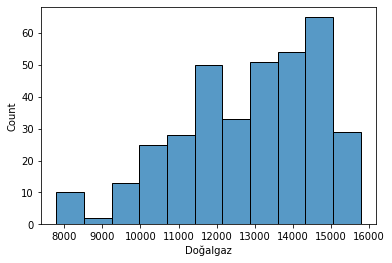

In [36]:
sns.histplot(df_prod['Doğalgaz'])

<AxesSubplot:xlabel='Rüzgar', ylabel='Count'>

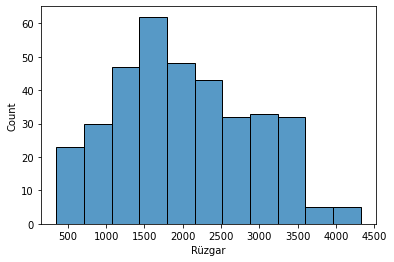

In [37]:
sns.histplot(df_prod['Rüzgar'])

<AxesSubplot:xlabel='Toplam', ylabel='Count'>

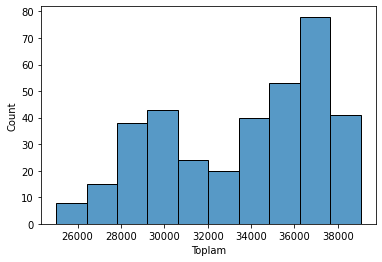

In [38]:
sns.histplot(df_prod['Toplam'])

<AxesSubplot:xlabel='Doğalgaz', ylabel='Toplam'>

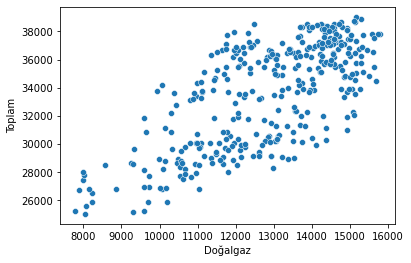

In [40]:
sns.scatterplot(x=df_prod['Doğalgaz'], y=df_prod['Toplam'])

In [46]:
df_prod[features].corr()

,Doğalgaz,Rüzgar
Doğalgaz,1.000000,0.023828
Rüzgar,0.023828,1.000000


In [9]:
X = df_prod[features].values
y = df_prod[target].values

#### Decision Tree Regression

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [15]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [22]:
y_pred = regressor.predict(X_test)

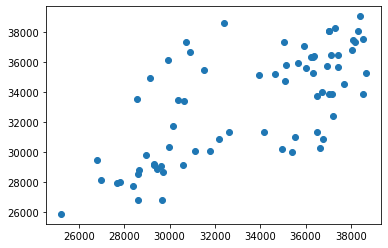

In [25]:
plt.scatter(y_test.flatten(), y_pred.flatten())

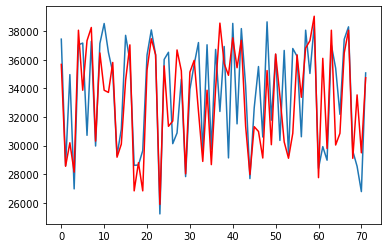

In [27]:
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_pred)), y_pred, color='red')

In [31]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2101.274583333334
2862.725380729631


In [34]:
export_graphviz(regressor, feature_names=features, out_file='tree.dot')

#### Decision Tree Classification

In [57]:
y = np.where(y<np.mean(y), 'Lower Than Average', 'Higher Than Average')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.21, random_state=42)

In [60]:
clf_model = DecisionTreeClassifier(criterion='gini', random_state=42,
                                   max_depth=3, min_samples_leaf = 5)
clf_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [61]:
y_predict = clf_model.predict(X_test)

In [63]:
accuracy_score(y_test, y_predict)

0.8421052631578947

In [74]:
dot_data = export_graphviz(clf_model, out_file=None,
                           feature_names=features, class_names=target[0],
                           filled=True, rounded=True,
                           special_characters=True)
# first install graphviz
#graph = graphviz.Source(dot_data)  

<function matplotlib.pyplot.show(close=None, block=None)>

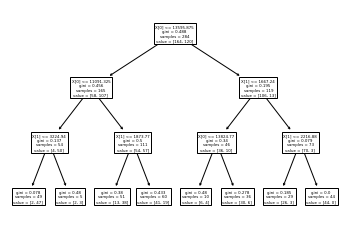

In [78]:
tree.plot_tree(clf_model)
plt.show